posx and posy should be finite values
posx and posy should be finite values


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

不同性别的生还率：
       性别       生还率
0  female  0.742038
1    male  0.188908

不同年龄组的生还率：
     年龄组  Survived
0   0-10  0.612903
1  11-20  0.401961
2  21-30  0.350000
3  31-40  0.437126
4  41-50  0.382022
5  51-60  0.416667
6  61-70  0.315789
7

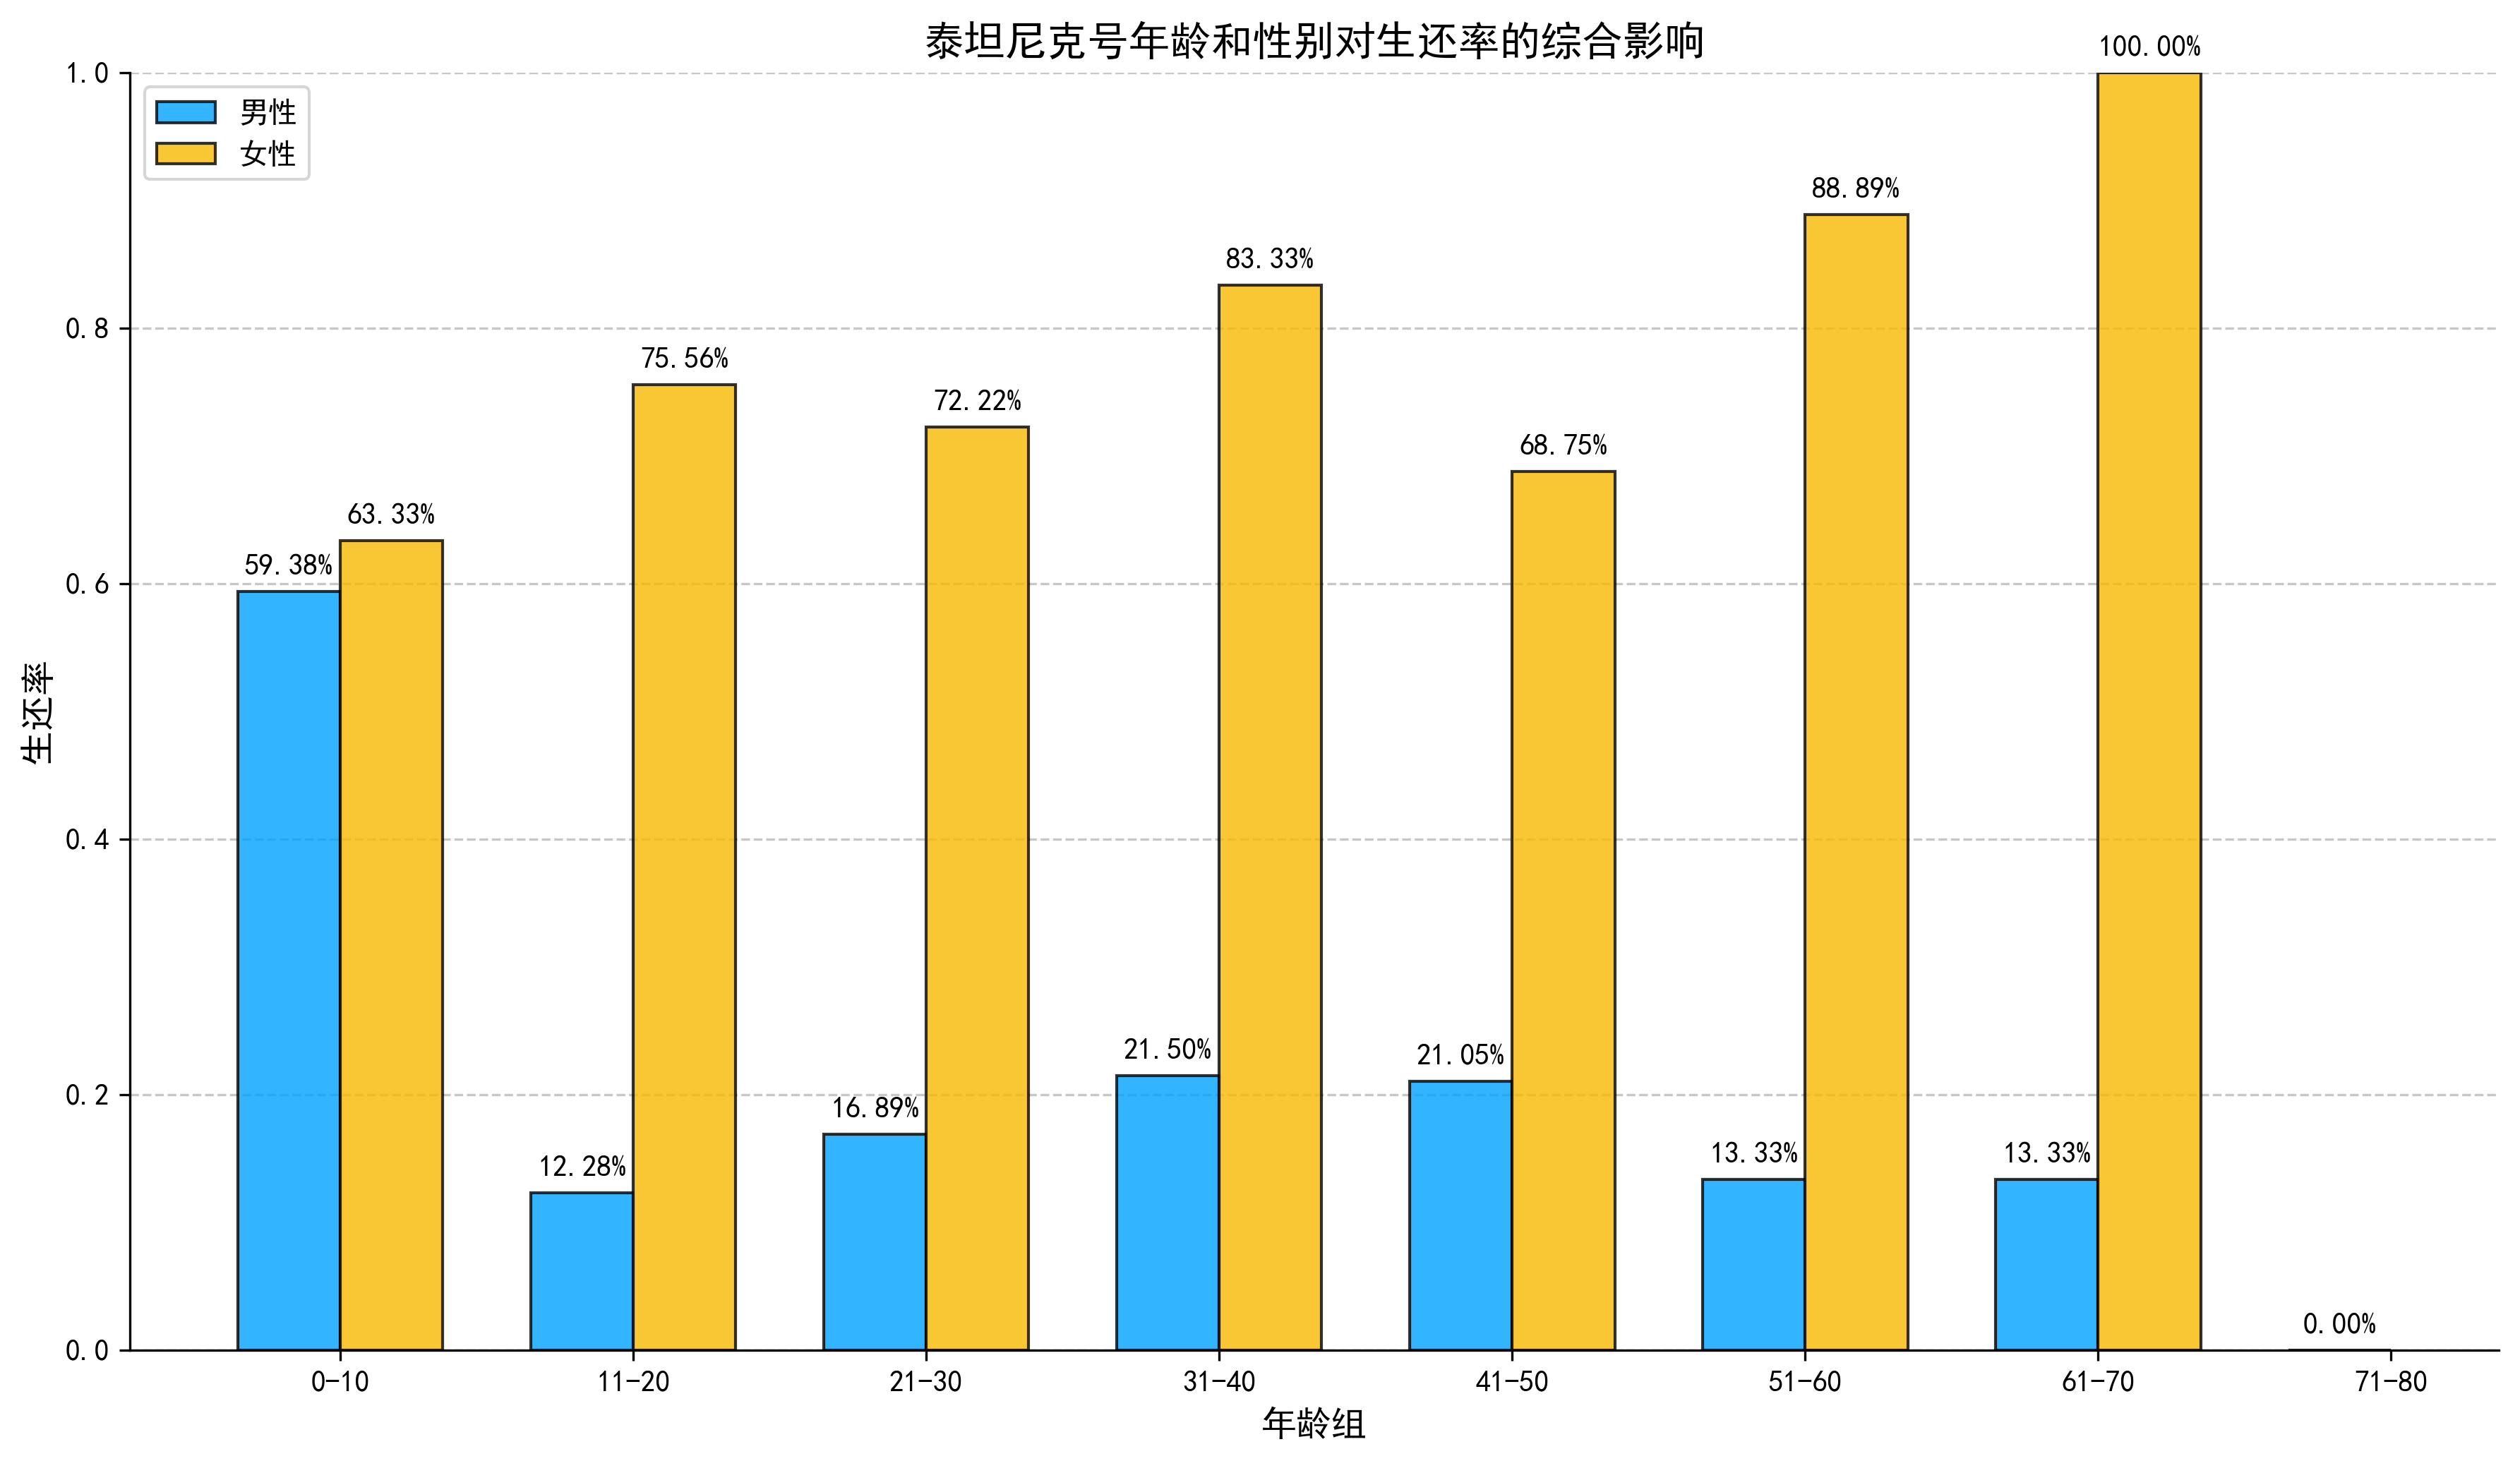

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']

# 文件路径（请根据实际情况修改）
file_path = r"C:\Users\HONOR\Desktop\train.csv"

try:
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 查看数据基本信息
    print("数据基本信息：")
    df.info()
    
    # 查看数据集行数和列数
    rows, columns = df.shape
    
    if rows == 0:
        print("错误：数据集中没有记录")
    else:
        # -------------------- 性别对生还率的影响 --------------------
        # 计算不同性别的生还率
        survival_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
        survival_by_sex.columns = ['性别', '生还率']
        print("\n不同性别的生还率：")
        print(survival_by_sex)
        
        # 绘制性别生还率柱状图（略，与原代码一致）
        # ...（原代码此处省略）...
        
        # -------------------- 年龄对生还率的影响 --------------------
        # 确保有Age列
        if 'Age' in df.columns:
            # 创建年龄分组
            age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
            age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
            df['年龄组'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
            
            # 计算各年龄组的生还率
            survival_by_age = df.dropna(subset=['Age']).groupby('年龄组')['Survived'].mean().reset_index()
            print("\n不同年龄组的生还率：")
            print(survival_by_age)
            
            # 绘制年龄生还率柱状图（略，与原代码一致）
            # ...（原代码此处省略）...
            
            # -------------------- 年龄和性别对生还率的综合影响（直方图）--------------------
            # 计算年龄-性别分组的生还率
            survival_by_age_sex = df.dropna(subset=['Age']).groupby(['年龄组', 'Sex'])['Survived'].mean().reset_index()
            
            # 转换为透视表格式，便于绘图
            pivot_data = survival_by_age_sex.pivot(index='年龄组', columns='Sex', values='Survived')
            print("\n年龄和性别对生还率的综合影响：")
            print(pivot_data)
            
            # 绘制分组直方图（柱状图）
            plt.figure(figsize=(12, 7))
            x = np.arange(len(pivot_data.index))  # 年龄组位置
            width = 0.35  # 柱子宽度
            
            # 绘制男性和女性的生还率柱状图
            bars1 = plt.bar(x - width/2, pivot_data['male'], width, 
                           label='男性', color='#00A1FF', edgecolor='black', alpha=0.8, zorder=2)
            bars2 = plt.bar(x + width/2, pivot_data['female'], width, 
                           label='女性', color='#f8ba00', edgecolor='black', alpha=0.8, zorder=2)
            
            # 添加数值标签
            def add_labels(bars):
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                             f'{height:.2%}', ha='center', va='bottom', fontsize=10)
            add_labels(bars1)
            add_labels(bars2)
            
            # 添加标题和标签
            plt.title('泰坦尼克号年龄和性别对生还率的综合影响', fontsize=14)
            plt.xlabel('年龄组', fontsize=12)
            plt.ylabel('生还率', fontsize=12)
            plt.ylim(0, 1)
            plt.xticks(x, pivot_data.index)
            plt.legend()
            
            # 添加网格线
            plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        else:
            print("警告：数据集中缺少年龄(Age)列，无法分析年龄对生还率的影响")

except FileNotFoundError:
    print(f"错误：文件 {file_path} 不存在，请检查文件路径是否正确。")
except Exception as e:
    print(f"处理数据时发生错误：{str(e)}")